# 2020

In [ ]:
import pandas as pd

# Path to the Excel file
file_path = "Merged_2020.csv"

# Read the Excel file into a DataFrame
df_20 = pd.read_csv(file_path)
df_20

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Total Produksi per Provinsi (2020)')

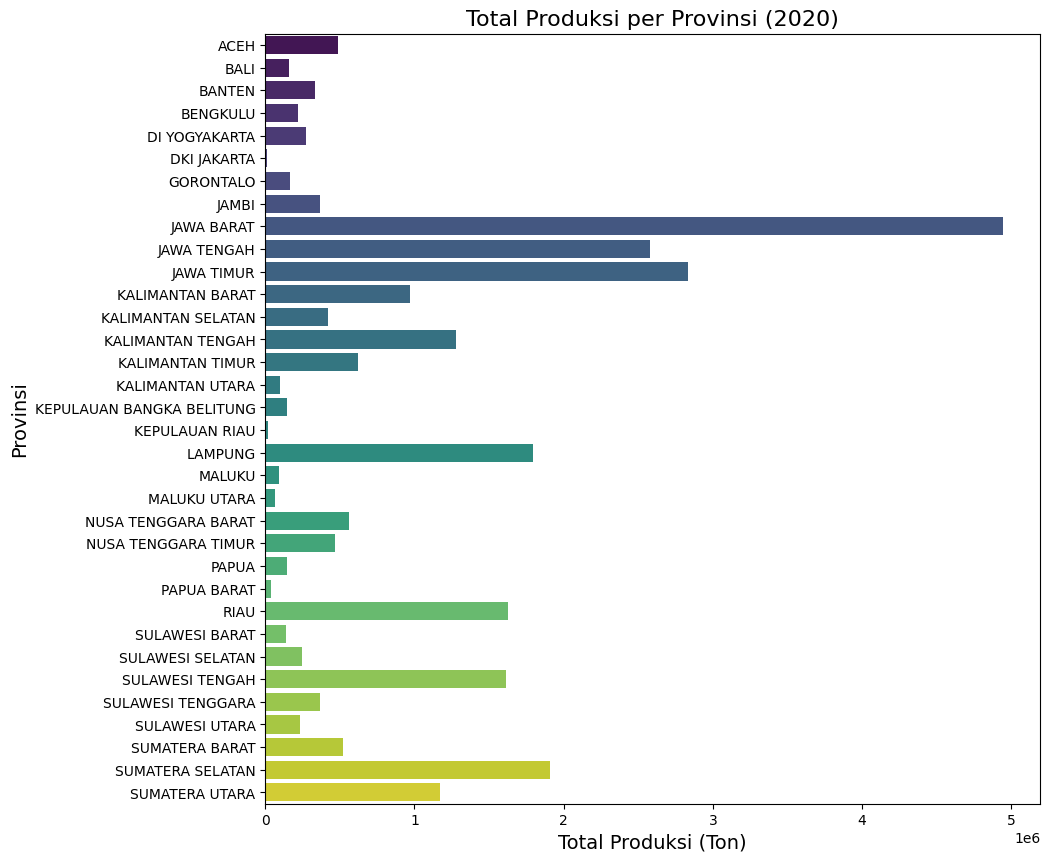

In [ ]:
# Menghitung total produksi per provinsi
total_per_provinsi = df_20.groupby('PROVINSI')['PRODUKSI (TON)'].sum().reset_index()

# Membuat plot batang
plt.figure(figsize=(10, 10))
sns.barplot(data=total_per_provinsi, x='PRODUKSI (TON)', y='PROVINSI', hue='PROVINSI', palette='viridis')
plt.xlabel('Total Produksi (Ton)', fontsize=14)
plt.ylabel('Provinsi', fontsize=14)
plt.title('Total Produksi per Provinsi (2020)', fontsize=16)


In [ ]:
# Menghitung total produksi per provinsi
total_per_provinsi = df_20.groupby('PROVINSI')['PDRB'].mean().reset_index()

# Membuat plot batang
plt.figure(figsize=(10, 10))
sns.barplot(data=total_per_provinsi, x='PDRB', y='PROVINSI', hue='PROVINSI', palette='viridis')
plt.xlabel('Jumlah PDRB', fontsize=14)
plt.ylabel('Provinsi', fontsize=14)
plt.title('Total PDRB per Provinsi (2020)', fontsize=16)


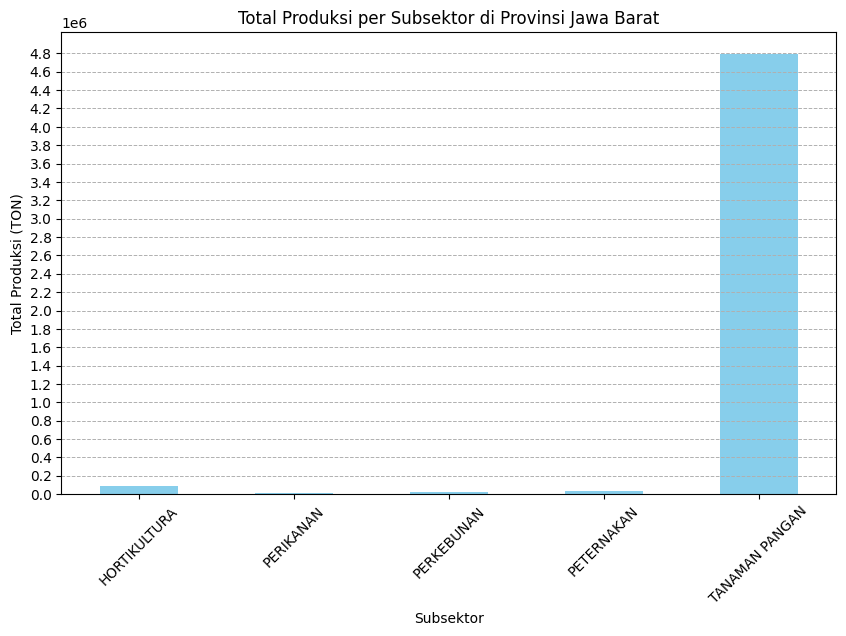

In [ ]:
# Memfilter data untuk provinsi Aceh
jabar = df_20[df_20['PROVINSI'] == 'JAWA BARAT']

# Mengelompokkan data berdasarkan subsektor dan menghitung total produksi
total_produksi_per_subsektor = jabar.groupby('SUBSEKTOR')['PRODUKSI (TON)'].sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
total_produksi_per_subsektor.plot(kind='bar', color='skyblue', ax=ax)
plt.title('Total Produksi per Subsektor di Provinsi Jawa Barat')
plt.xlabel('Subsektor')
plt.ylabel('Total Produksi (TON)')
plt.xticks(rotation=45)

# Mengatur sumbu y untuk meningkat setiap 500,000
y_ticks = range(0, int(total_produksi_per_subsektor.max()) + 200000, 200000)
ax.set_yticks(y_ticks)

# Menampilkan grid
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

## PREPRO

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Langkah 2: Melakukan transformasi MinMaxScaler pada kolom "2020"
scaler = MinMaxScaler()

# Pastikan data dalam bentuk array 2 dimensi
df_20['PRODUKSI_scaler'] = scaler.fit_transform(df_20[['PRODUKSI (TON)']])
df_20['NTP_scaler'] = scaler.fit_transform(df_20[['NTP']])
df_20['PDRB_scaler'] = scaler.fit_transform(df_20[['PDRB']])

In [ ]:
df_20

,TAHUN,PROVINSI,LONGTITUDE,LATITUDE,SUBSEKTOR,NTP,KEMISKINAN,PDRB,INCOME PER CAPITA,GEI PROVINCE,PRODUKSI (TON),PRODUKSI_scaler,NTP_scaler,PDRB_scaler,Cluster
0,2020,ACEH,4.695135,96.7494,TANAMAN PANGAN,99.080,815,166372.3,543451.4055,48.235825,376457.258300,0.078469,0.792323,0.045731,2
1,2020,ACEH,4.695135,96.7494,HORTIKULTURA,94.940,815,166372.3,543451.4055,48.235825,9058.336584,0.001782,0.759216,0.045731,2
2,2020,ACEH,4.695135,96.7494,PERKEBUNAN,99.170,815,166372.3,543451.4055,48.235825,93241.243570,0.019353,0.793043,0.045731,2
3,2020,ACEH,4.695135,96.7494,PETERNAKAN,97.270,815,166372.3,543451.4055,48.235825,3162.797625,0.000551,0.777849,0.045731,2
4,2020,ACEH,4.695135,96.7494,PERIKANAN,96.365,815,166372.3,543451.4055,48.235825,3572.286738,0.000637,0.770612,0.045731,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020,PAPUA,-4.269930,138.0804,TANAMAN PANGAN,101.460,911,199186.6,692037.1260,69.234092,59975.101010,0.012410,0.811355,0.057771,2
166,2020,PAPUA,-4.269930,138.0804,HORTIKULTURA,99.340,911,199186.6,692037.1260,69.234092,1703.539070,0.000247,0.794402,0.057771,2
167,2020,PAPUA,-4.269930,138.0804,PERKEBUNAN,100.050,911,199186.6,692037.1260,69.234092,80643.500000,0.016724,0.800080,0.057771,2
168,2020,PAPUA,-4.269930,138.0804,PETERNAKAN,108.340,911,199186.6,692037.1260,69.234092,1556.123571,0.000216,0.866373,0.057771,2


In [ ]:
aa= df_20.drop(columns=['LONGTITUDE',	'LATITUDE', 'KEMISKINAN', 'INCOME PER CAPITA',	'GEI PROVINCE', 'Cluster', 'NTP', 'NTP_scaler'])
aa.set_index('TAHUN', inplace=True)
aa

,PROVINSI,SUBSEKTOR,PDRB,PRODUKSI (TON),PRODUKSI_scaler,PDRB_scaler
TAHUN,,,,,,
2020,ACEH,TANAMAN PANGAN,166372.3,376457.258300,0.078469,0.045731
2020,ACEH,HORTIKULTURA,166372.3,9058.336584,0.001782,0.045731
2020,ACEH,PERKEBUNAN,166372.3,93241.243570,0.019353,0.045731
2020,ACEH,PETERNAKAN,166372.3,3162.797625,0.000551,0.045731
2020,ACEH,PERIKANAN,166372.3,3572.286738,0.000637,0.045731
...,...,...,...,...,...,...
2020,PAPUA,TANAMAN PANGAN,199186.6,59975.101010,0.012410,0.057771
2020,PAPUA,HORTIKULTURA,199186.6,1703.539070,0.000247,0.057771
2020,PAPUA,PERKEBUNAN,199186.6,80643.500000,0.016724,0.057771


In [ ]:
# Mengisi nilai NaN dengan 0
df_20.fillna(0, inplace=True)

In [ ]:
df_20.isna().sum()

TAHUN                0
PROVINSI             0
LONGTITUDE           0
LATITUDE             0
SUBSEKTOR            0
NTP                  0
KEMISKINAN           0
PDRB                 0
INCOME PER CAPITA    0
GEI PROVINCE         0
PRODUKSI (TON)       0
PRODUKSI_scaler      0
NTP_scaler           0
PDRB_scaler          0
dtype: int64

In [ ]:
df_20['PRODUKSI_scaler'].describe()

count    170.000000
mean       0.032964
std        0.107969
min        0.000000
25%        0.000487
50%        0.001971
75%        0.015586
max        1.000000
Name: PRODUKSI_scaler, dtype: float64

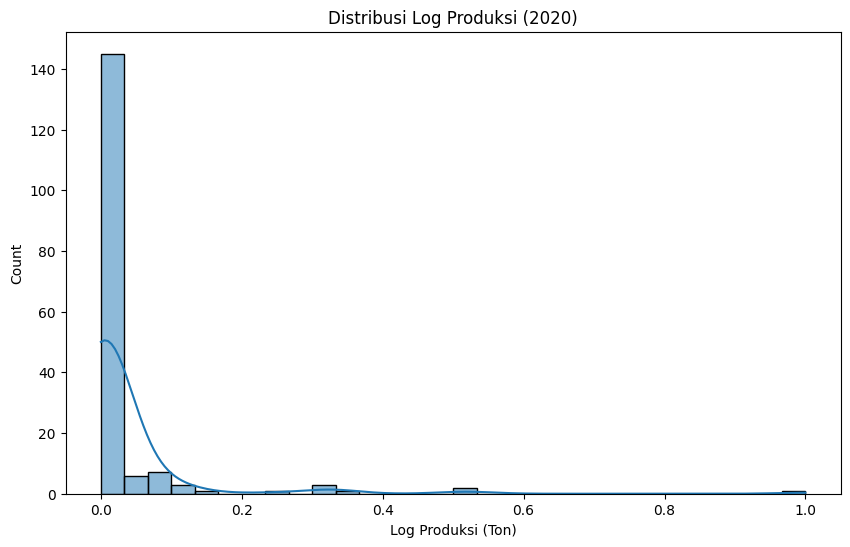

In [ ]:
# Membuat histogram untuk kolom "2020_scaler"
plt.figure(figsize=(10, 6))
sns.histplot(df_20['PRODUKSI_scaler'],bins=30, kde=True)
plt.xlabel('Log Produksi (Ton)')
plt.title('Distribusi Log Produksi (2020)')
plt.show()


## Klasterisasi

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score


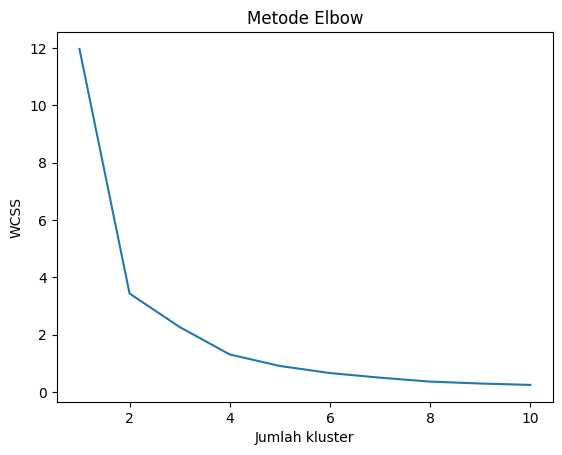

In [ ]:
# Memilih hanya kolom yang diperlukan untuk clustering
X = df_20[['PDRB_scaler', 'PRODUKSI_scaler']]

wcss = []  # Within-cluster sums of squares

# Menghitung WCSS untuk berbagai nilai k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot hasilnya untuk melihat Elbow
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

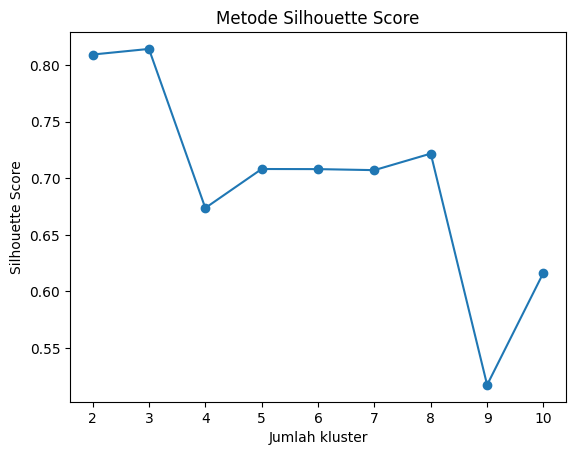

Jumlah kluster optimal berdasarkan Silhouette Score: 3
0.8143718960861306


In [ ]:
silhouette_scores = []
n_components_range = range(2, 11)  # Mulai dari 2 karena silhouette score tidak terdefinisi untuk 1 kluster

for n_components in n_components_range:
    kmeans = KMeans(n_clusters=n_components, random_state=0, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot hasilnya untuk melihat nilai Silhouette Score
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.title('Metode Silhouette Score')
plt.xlabel('Jumlah kluster')
plt.ylabel('Silhouette Score')
plt.show()

# Menemukan jumlah kluster dengan Silhouette Score tertinggi
optimal_n_components = n_components_range[np.argmax(silhouette_scores)]
print(f"Jumlah kluster optimal berdasarkan Silhouette Score: {optimal_n_components}")
print(max(silhouette_scores))

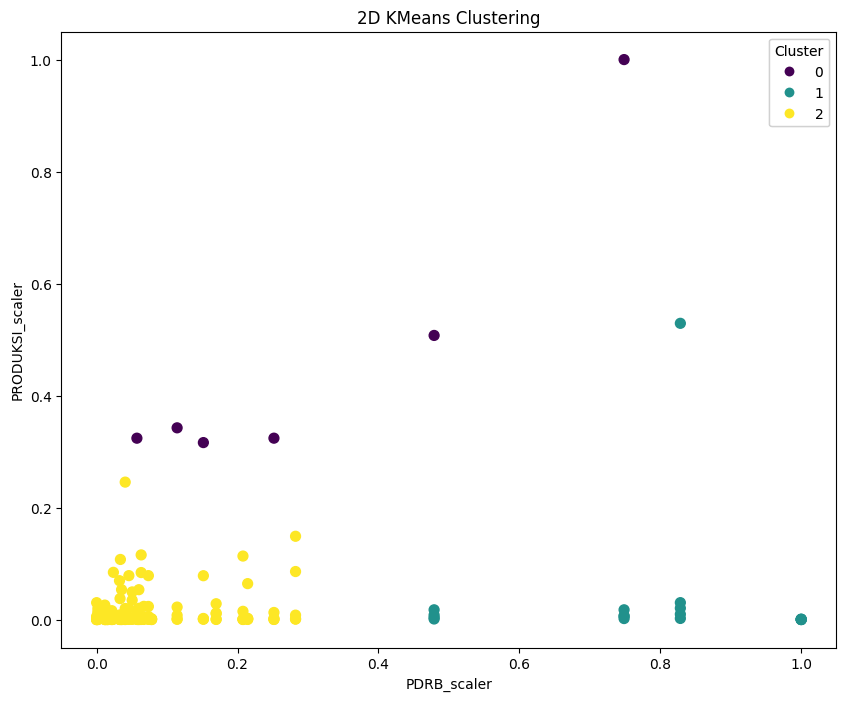

In [ ]:
# Visualisasi hasil clustering dalam plot 2D
plt.figure(figsize=(10, 8))
sc = plt.scatter(df_20['PDRB_scaler'], df_20['PRODUKSI_scaler'], c=df_20['Cluster'], cmap='viridis', s=50)

# Menambahkan label pada sumbu
plt.xlabel('PDRB_scaler')
plt.ylabel('PRODUKSI_scaler')

# Menambahkan legenda
legend = plt.legend(*sc.legend_elements(), title="Cluster")
plt.gca().add_artist(legend)

# Menampilkan plot
plt.title('2D KMeans Clustering')
plt.show()

In [ ]:
df_20

,TAHUN,PROVINSI,LONGTITUDE,LATITUDE,SUBSEKTOR,NTP,KEMISKINAN,PDRB,INCOME PER CAPITA,GEI PROVINCE,PRODUKSI (TON),PRODUKSI_scaler,NTP_scaler,PDRB_scaler,Cluster
0,2020,ACEH,4.695135,96.7494,TANAMAN PANGAN,99.080,815,166372.3,543451.4055,48.235825,376457.258300,0.078469,0.792323,0.045731,2
1,2020,ACEH,4.695135,96.7494,HORTIKULTURA,94.940,815,166372.3,543451.4055,48.235825,9058.336584,0.001782,0.759216,0.045731,2
2,2020,ACEH,4.695135,96.7494,PERKEBUNAN,99.170,815,166372.3,543451.4055,48.235825,93241.243570,0.019353,0.793043,0.045731,2
3,2020,ACEH,4.695135,96.7494,PETERNAKAN,97.270,815,166372.3,543451.4055,48.235825,3162.797625,0.000551,0.777849,0.045731,2
4,2020,ACEH,4.695135,96.7494,PERIKANAN,96.365,815,166372.3,543451.4055,48.235825,3572.286738,0.000637,0.770612,0.045731,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020,PAPUA,-4.269930,138.0804,TANAMAN PANGAN,101.460,911,199186.6,692037.1260,69.234092,59975.101010,0.012410,0.811355,0.057771,2
166,2020,PAPUA,-4.269930,138.0804,HORTIKULTURA,99.340,911,199186.6,692037.1260,69.234092,1703.539070,0.000247,0.794402,0.057771,2
167,2020,PAPUA,-4.269930,138.0804,PERKEBUNAN,100.050,911,199186.6,692037.1260,69.234092,80643.500000,0.016724,0.800080,0.057771,2
168,2020,PAPUA,-4.269930,138.0804,PETERNAKAN,108.340,911,199186.6,692037.1260,69.234092,1556.123571,0.000216,0.866373,0.057771,2


## HASIL

In [ ]:
# Filter data untuk cluster 0
cluster_0_data = df_20[df_20['Cluster'] == 1]
cluster_0_data


,TAHUN,PROVINSI,LONGTITUDE,LATITUDE,SUBSEKTOR,NTP,KEMISKINAN,PDRB,INCOME PER CAPITA,GEI PROVINCE,PRODUKSI (TON),PRODUKSI_scaler,NTP_scaler,PDRB_scaler,Cluster
50,2020,DKI JAKARTA,-6.20876,106.8456,TANAMAN PANGAN,0.000,481,2767273.0,1.613945e+06,40.166255,4.543930e+03,0.000840,0.000000,1.000000,1
51,2020,DKI JAKARTA,-6.20876,106.8456,HORTIKULTURA,0.000,481,2767273.0,1.613945e+06,40.166255,6.817302e+02,0.000033,0.000000,1.000000,1
52,2020,DKI JAKARTA,-6.20876,106.8456,PERKEBUNAN,0.000,481,2767273.0,1.613945e+06,40.166255,0.000000e+00,0.000000,0.000000,1.000000,1
53,2020,DKI JAKARTA,-6.20876,106.8456,PETERNAKAN,0.000,481,2767273.0,1.613945e+06,40.166255,1.871776e+03,0.000282,0.000000,1.000000,1
54,2020,DKI JAKARTA,-6.20876,106.8456,PERIKANAN,98.835,481,2767273.0,1.613945e+06,40.166255,1.703594e+03,0.000247,0.790364,1.000000,1
56,2020,JAWA BARAT,-6.91746,107.6191,HORTIKULTURA,100.410,3920,2082107.0,4.898317e+05,61.675273,8.423047e+04,0.017473,0.802959,0.748613,1
57,2020,JAWA BARAT,-6.91746,107.6191,PERKEBUNAN,92.720,3920,2082107.0,4.898317e+05,61.675273,2.834745e+04,0.005808,0.741463,0.748613,1
58,2020,JAWA BARAT,-6.91746,107.6191,PETERNAKAN,95.360,3920,2082107.0,4.898317e+05,61.675273,3.413772e+04,0.007017,0.762575,0.748613,1
59,2020,JAWA BARAT,-6.91746,107.6191,PERIKANAN,101.440,3920,2082107.0,4.898317e+05,61.675273,9.320452e+03,0.001837,0.811196,0.748613,1
61,2020,JAWA TENGAH,-7.15098,110.1403,HORTIKULTURA,107.360,3981,1347222.0,5.562873e+05,54.050858,8.417921e+04,0.017462,0.858537,0.478984,1


In [ ]:
# Filter data untuk cluster 6
cluster_6_data = df_20[df_20['Cluster'] == 0]
cluster_6_data


,TAHUN,PROVINSI,LONGTITUDE,LATITUDE,SUBSEKTOR,NTP,KEMISKINAN,PDRB,INCOME PER CAPITA,GEI PROVINCE,PRODUKSI (TON),PRODUKSI_scaler,NTP_scaler,PDRB_scaler,Cluster
17,2020,RIAU,0.293347,101.7068,PERKEBUNAN,123.73,483,727599.5,1.234458e+06,54.489927,1552475.286,0.323941,0.989444,0.251645,0
25,2020,SUMATERA SELATAN,-3.319440,104.9147,TANAMAN PANGAN,98.27,1082,454607.4,6.551586e+05,53.538927,1514739.340,0.316064,0.785846,0.151484,0
35,2020,LAMPUNG,-5.450000,105.2667,TANAMAN PANGAN,94.26,1049,353025.1,5.219603e+05,49.205880,1640974.813,0.342413,0.753778,0.114214,0
55,2020,JAWA BARAT,-6.917460,107.6191,TANAMAN PANGAN,103.28,3920,2082107.0,4.898317e+05,61.675273,4791376.290,1.000000,0.825910,0.748613,0
60,2020,JAWA TENGAH,-7.150980,110.1403,TANAMAN PANGAN,103.93,3981,1347222.0,5.562873e+05,54.050858,2431418.696,0.507404,0.831108,0.478984,0
125,2020,SULAWESI TENGAH,-1.430300,121.4456,TANAMAN PANGAN,97.58,399,197440.8,6.908663e+05,55.195679,1552334.173,0.323911,0.780328,0.057130,0


### Provinsi

#### cluster 1

In [ ]:
# Filter DataFrame untuk memilih hanya data yang memiliki label kluster 0
cluster_0_data_prov_20 = df_20[df_20['Cluster'] == 0]

# Hitung jumlah setiap nilai unik dalam kolom 'Subsektor'
subsektor_counts_cluster_0_prov_20 = cluster_0_data_prov_20['PROVINSI'].value_counts()
subsektor_counts_cluster_0_prov_20

PROVINSI
RIAU                1
SUMATERA SELATAN    1
LAMPUNG             1
JAWA BARAT          1
JAWA TENGAH         1
SULAWESI TENGAH     1
Name: count, dtype: int64

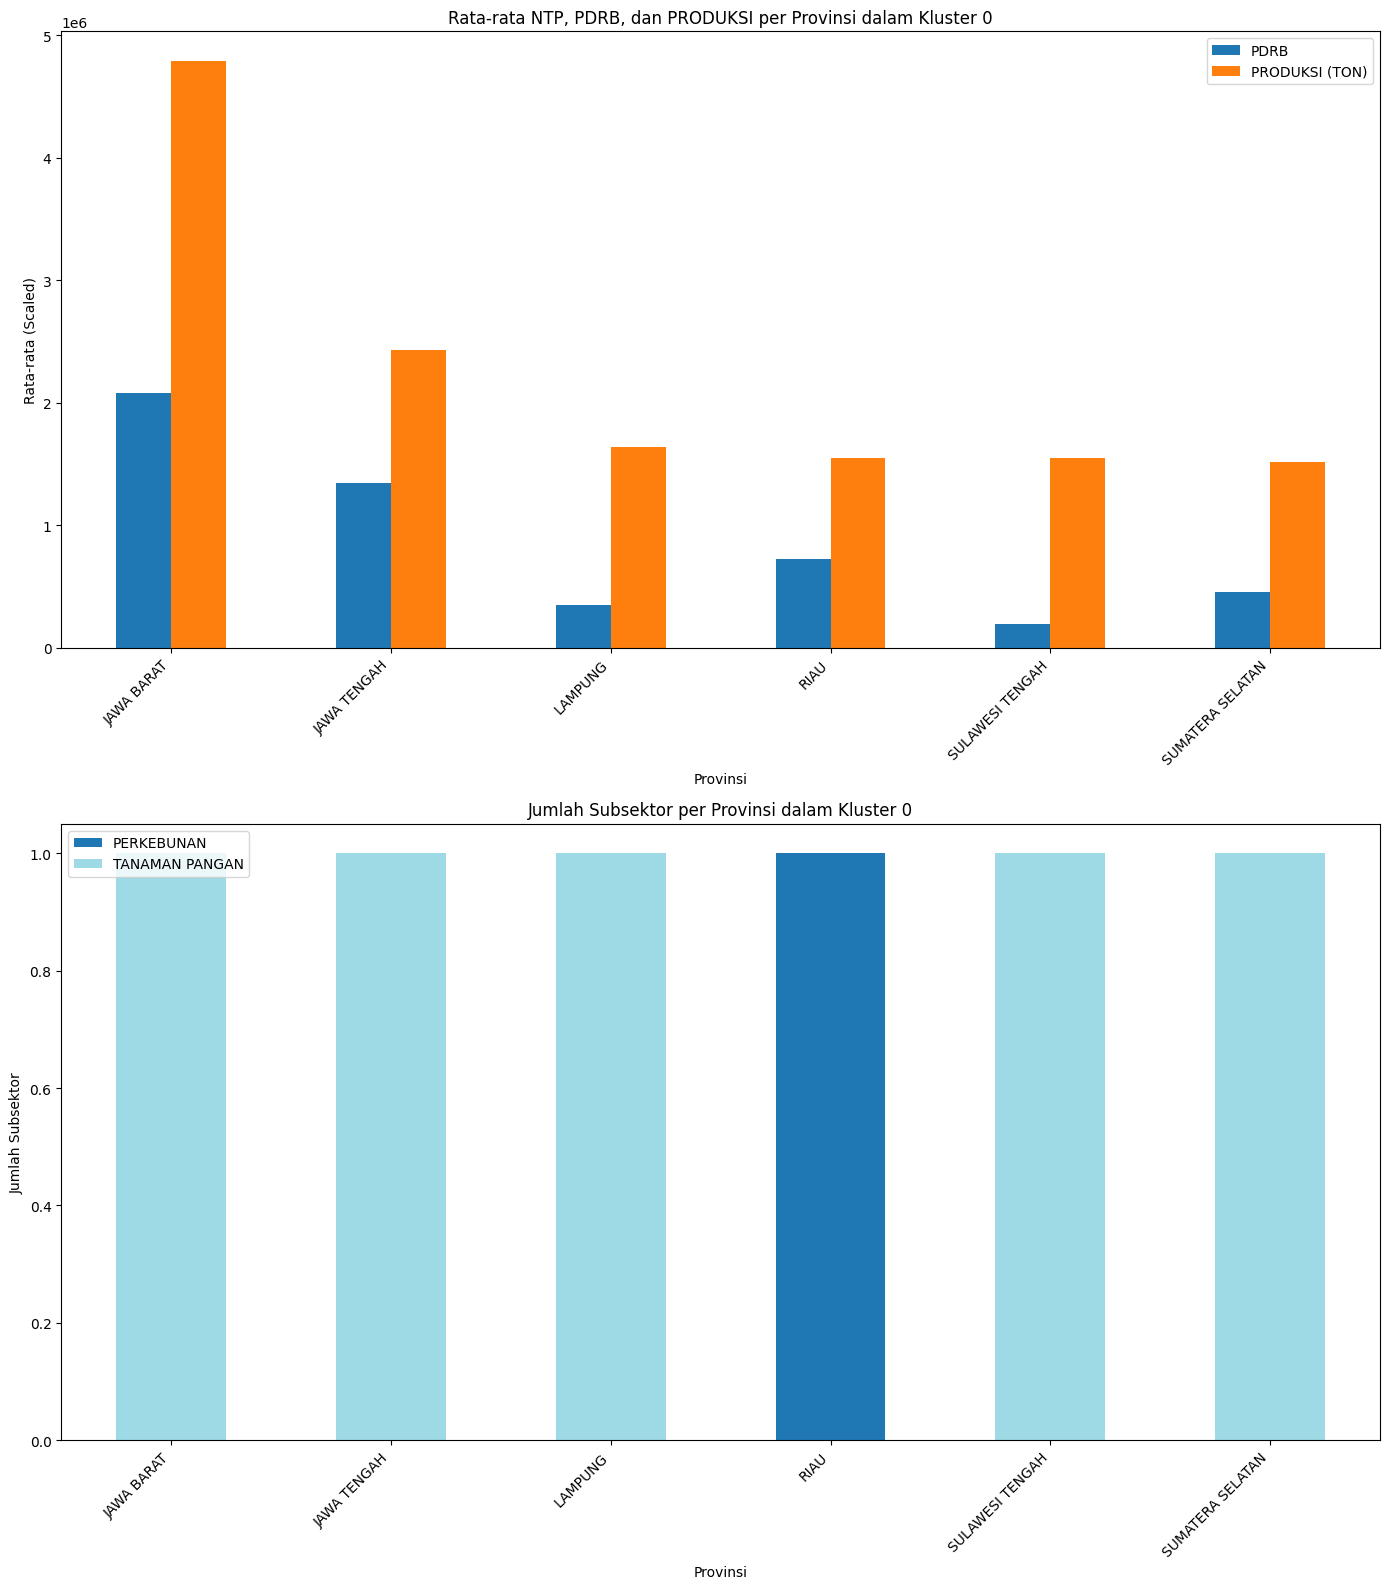

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung rata-rata untuk variabel numerik
provinsi_mean = cluster_0_data_prov_20.groupby('PROVINSI')[['PDRB', 'PRODUKSI (TON)']].mean()

# Mengelompokkan data berdasarkan 'PROVINSI' dan 'SUBSEKTOR' dan menghitung jumlahnya
provinsi_subsektor_counts = cluster_0_data_prov_20.groupby(['PROVINSI', 'SUBSEKTOR']).size().unstack()

# Membuat subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Plot rata-rata variabel numerik
provinsi_mean.plot(kind='bar', ax=ax1)
ax1.set_title('Rata-rata PDRB, dan PRODUKSI per Provinsi dalam Kluster 0')
ax1.set_xlabel('Provinsi')
ax1.set_ylabel('Rata-rata (Scaled)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper right')

# Plot jumlah kemunculan unik variabel kategorikal
provinsi_subsektor_counts.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20')
ax2.set_title('Jumlah Subsektor per Provinsi dalam Kluster 0')
ax2.set_xlabel('Provinsi')
ax2.set_ylabel('Jumlah Subsektor')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()


#### cluster 2

In [ ]:
# Filter DataFrame untuk memilih hanya data yang memiliki label kluster 1
cluster_1_data_prov_20 = df_20[df_20['Cluster'] == 1]

# Hitung jumlah setiap nilai unik dalam kolom 'Subsektor'
subsektor_counts_cluster_1_prov_20 = cluster_1_data_prov_20['PROVINSI'].value_counts()
subsektor_counts_cluster_1_prov_20

PROVINSI
DKI JAKARTA    5
JAWA TIMUR     5
JAWA BARAT     4
JAWA TENGAH    4
Name: count, dtype: int64

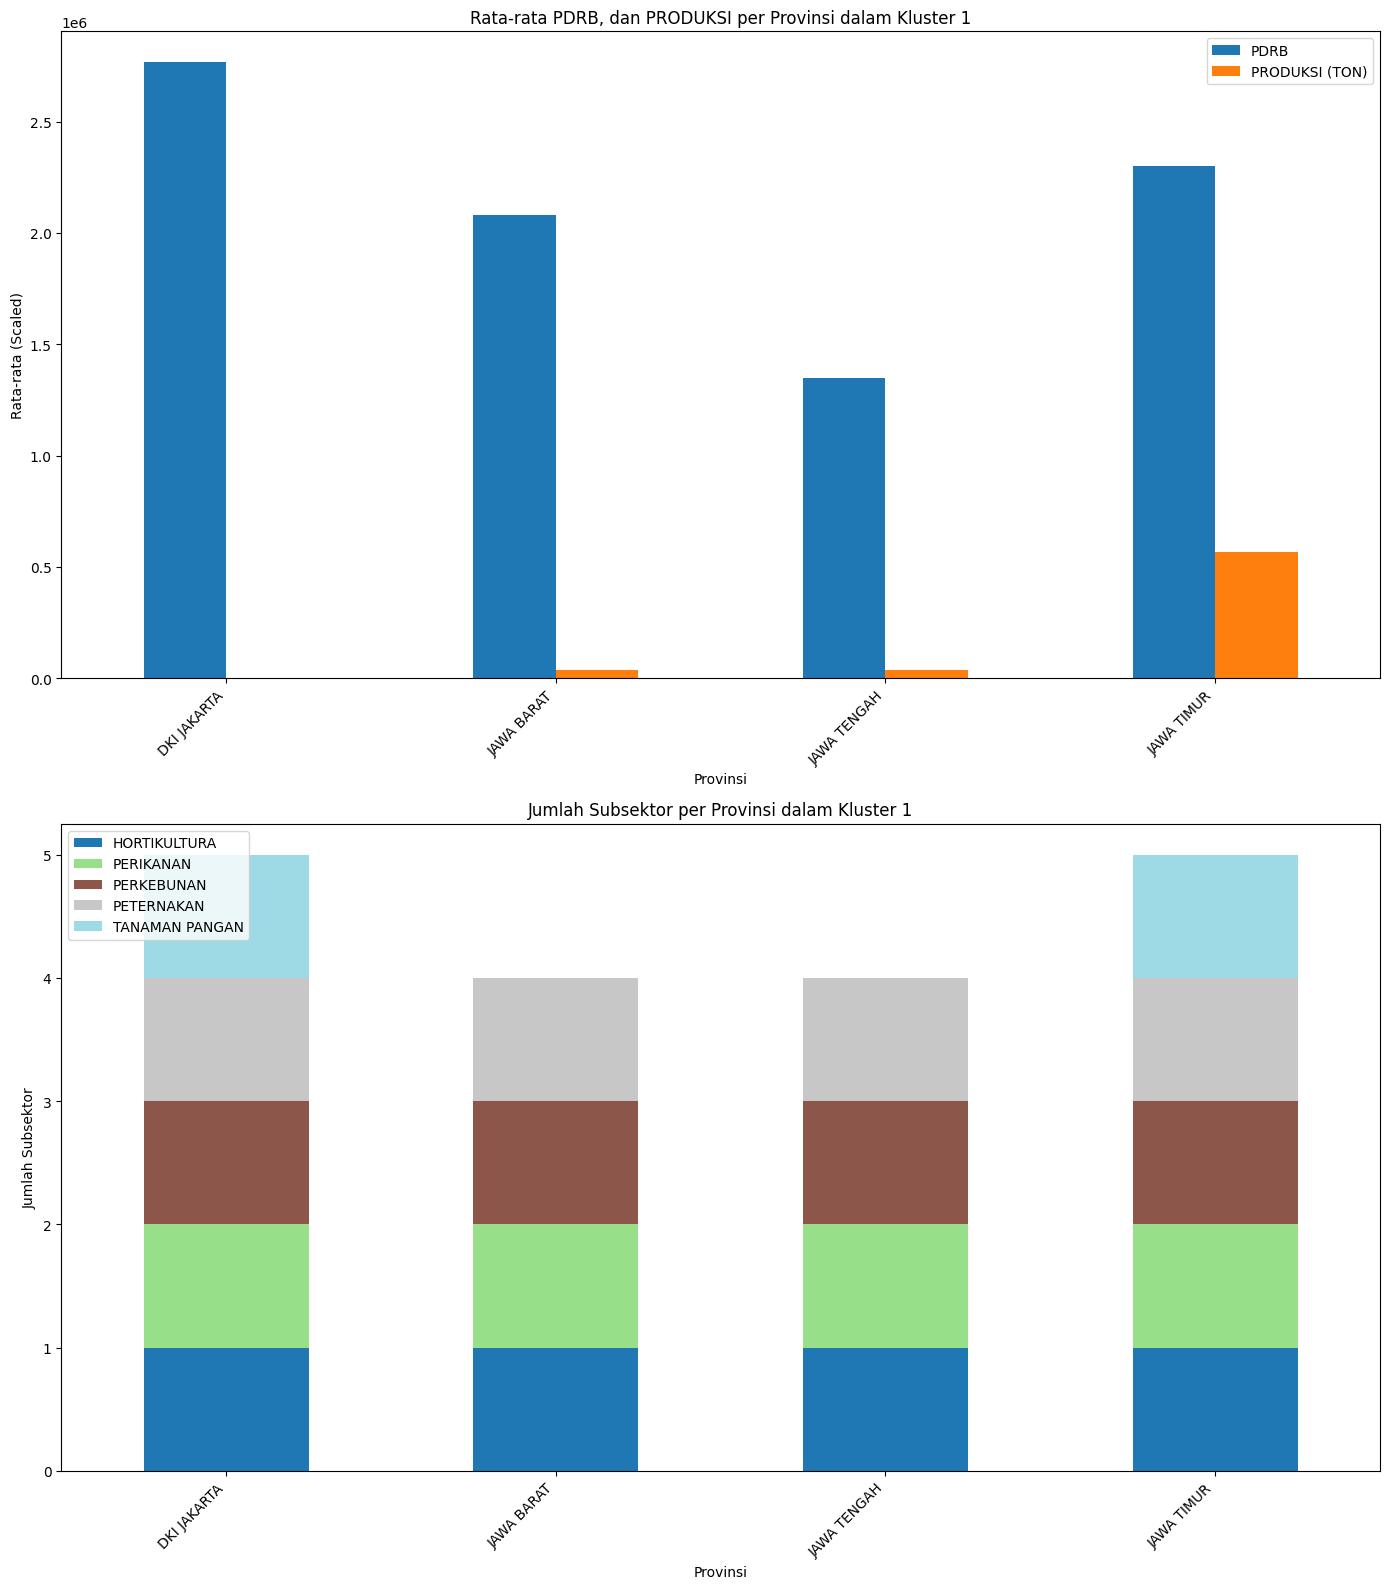

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung rata-rata untuk variabel numerik
provinsi_mean = cluster_1_data_prov_20.groupby('PROVINSI')[['PDRB', 'PRODUKSI (TON)']].mean()

# Mengelompokkan data berdasarkan 'PROVINSI' dan 'SUBSEKTOR' dan menghitung jumlahnya
provinsi_subsektor_counts = cluster_1_data_prov_20.groupby(['PROVINSI', 'SUBSEKTOR']).size().unstack()

# Membuat subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Plot rata-rata variabel numerik
provinsi_mean.plot(kind='bar', ax=ax1)
ax1.set_title('Rata-rata PDRB, dan PRODUKSI per Provinsi dalam Kluster 1')
ax1.set_xlabel('Provinsi')
ax1.set_ylabel('Rata-rata (Scaled)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper right')

# Plot jumlah kemunculan unik variabel kategorikal
provinsi_subsektor_counts.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20')
ax2.set_title('Jumlah Subsektor per Provinsi dalam Kluster 1')
ax2.set_xlabel('Provinsi')
ax2.set_ylabel('Jumlah Subsektor')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()


#### claster 3

In [ ]:
# Filter DataFrame untuk memilih hanya data yang memiliki label kluster 2
cluster_2_data_prov_20 = df_20[df_20['Cluster'] == 2]

# Hitung jumlah setiap nilai unik dalam kolom 'Subsektor'
subsektor_counts_cluster_2_prov_20 = cluster_2_data_prov_20['PROVINSI'].value_counts()
subsektor_counts_cluster_2_prov_20

PROVINSI
ACEH                         5
SUMATERA UTARA               5
PAPUA BARAT                  5
MALUKU UTARA                 5
MALUKU                       5
SULAWESI BARAT               5
GORONTALO                    5
SULAWESI TENGGARA            5
SULAWESI SELATAN             5
SULAWESI UTARA               5
KALIMANTAN UTARA             5
KALIMANTAN TIMUR             5
KALIMANTAN SELATAN           5
KALIMANTAN TENGAH            5
KALIMANTAN BARAT             5
NUSA TENGGARA TIMUR          5
NUSA TENGGARA BARAT          5
BALI                         5
BANTEN                       5
DI YOGYAKARTA                5
KEPULAUAN RIAU               5
KEPULAUAN BANGKA BELITUNG    5
BENGKULU                     5
JAMBI                        5
SUMATERA BARAT               5
PAPUA                        5
SULAWESI TENGAH              4
LAMPUNG                      4
SUMATERA SELATAN             4
RIAU                         4
Name: count, dtype: int64

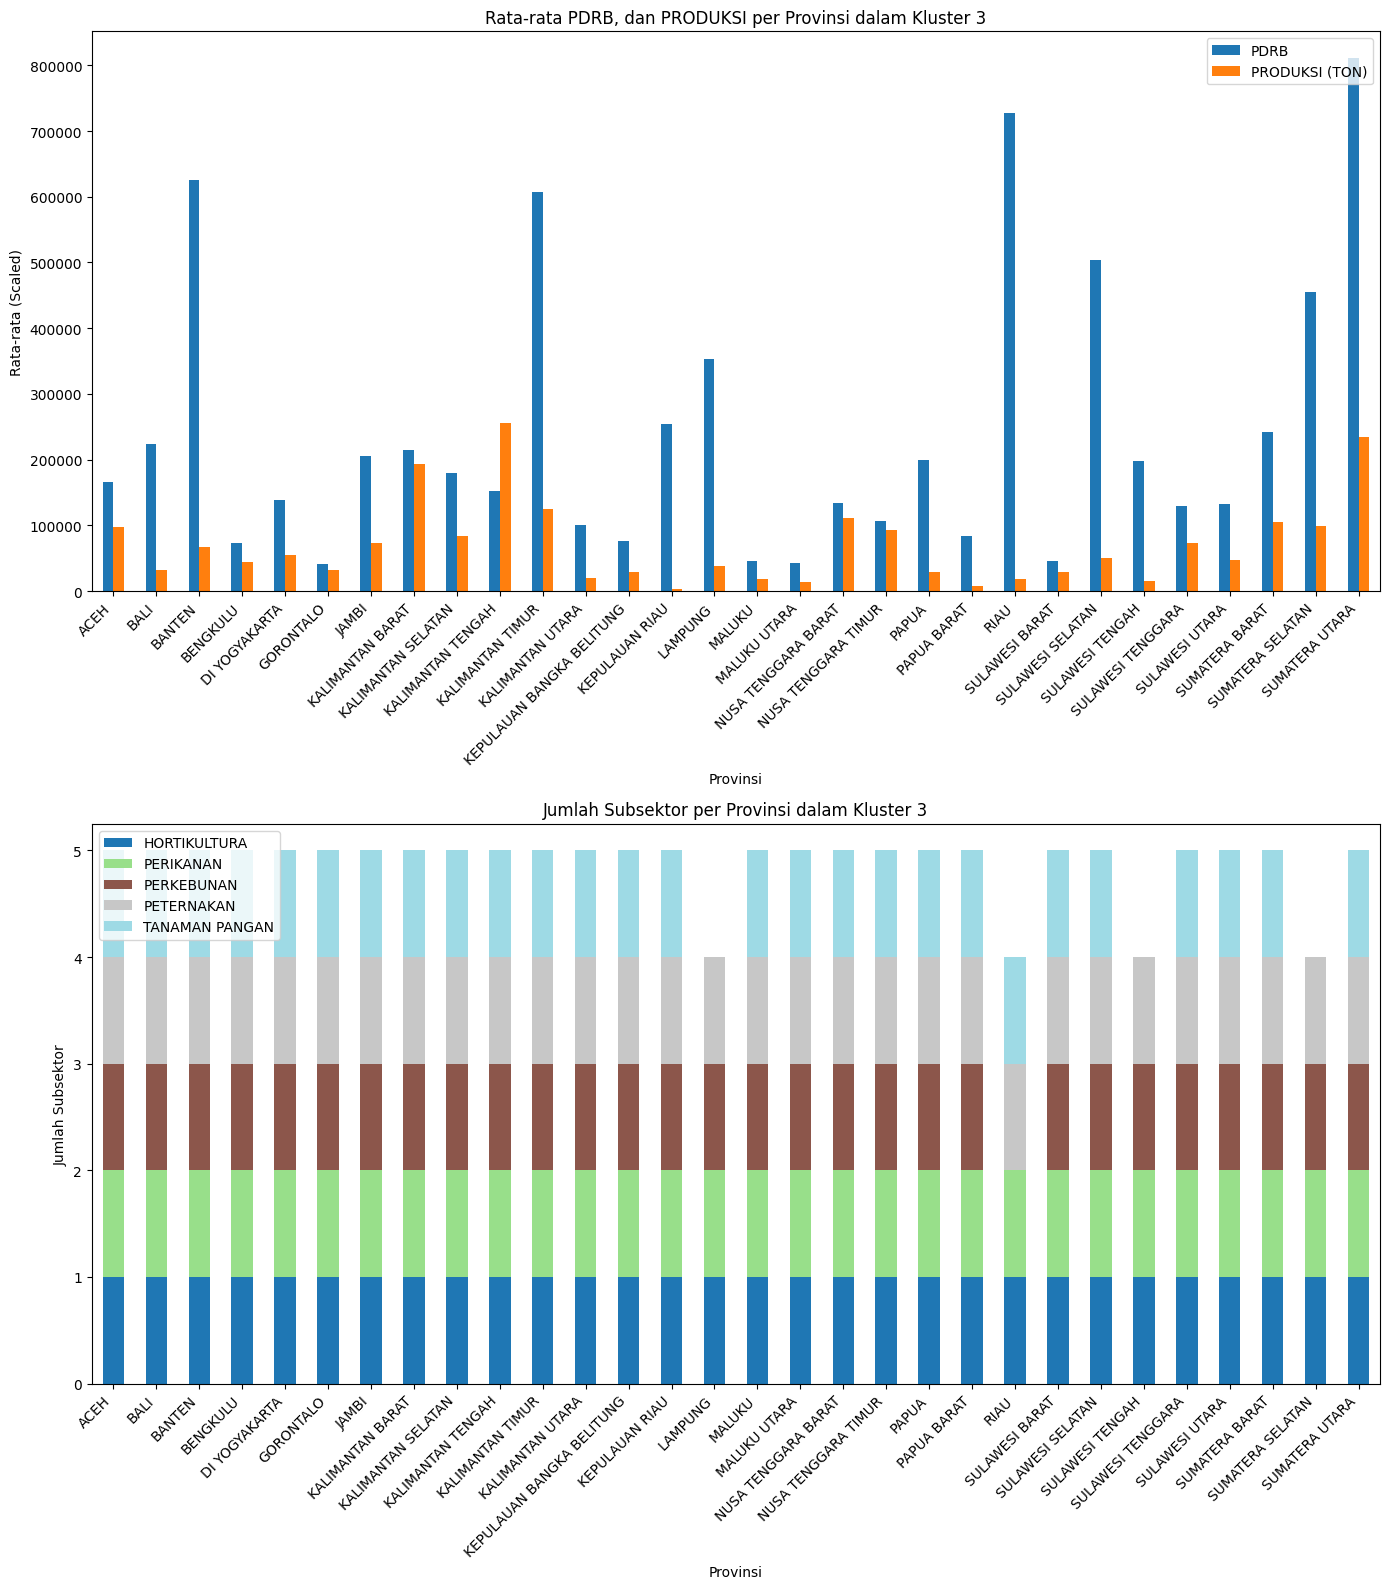

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Menghitung rata-rata untuk variabel numerik
provinsi_mean = cluster_2_data_prov_20.groupby('PROVINSI')[['PDRB', 'PRODUKSI (TON)']].mean()

# Mengelompokkan data berdasarkan 'PROVINSI' dan 'SUBSEKTOR' dan menghitung jumlahnya
provinsi_subsektor_counts = cluster_2_data_prov_20.groupby(['PROVINSI', 'SUBSEKTOR']).size().unstack()

# Membuat subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# Plot rata-rata variabel numerik
provinsi_mean.plot(kind='bar', ax=ax1)
ax1.set_title('Rata-rata PDRB, dan PRODUKSI per Provinsi dalam Kluster 3')
ax1.set_xlabel('Provinsi')
ax1.set_ylabel('Rata-rata (Scaled)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='upper right')

# Plot jumlah kemunculan unik variabel kategorikal
provinsi_subsektor_counts.plot(kind='bar', stacked=True, ax=ax2, colormap='tab20')
ax2.set_title('Jumlah Subsektor per Provinsi dalam Kluster 3')
ax2.set_xlabel('Provinsi')
ax2.set_ylabel('Jumlah Subsektor')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='upper left')

# Menampilkan plot
plt.tight_layout()
plt.show()
